# Decision Tree for KickStarProject dataset

Goal: predict state

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%store -r data

In [3]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['category', 'main_category', 'currency', 'deadline', 'goal', 'launched',
       'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'continent', 'days_launched',
       'launched_month'],
      dtype='object')
(5000, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 372978 to 378660
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   category          5000 non-null   object        
 1   main_category     5000 non-null   object        
 2   currency          5000 non-null   object        
 3   deadline          5000 non-null   datetime64[ns]
 4   goal              5000 non-null   float64       
 5   launched          5000 non-null   datetime64[ns]
 6   pledged           5000 non-null   float64       
 7   state             5000 non-null   int64         
 8   backers           5000 non-null   int64         
 9   country        

In [4]:
data_rn = data.copy()
data_rn.drop(['category','main_category','currency','deadline','goal','launched','country','continent','usd_goal_real','days_launched','launched_month'] ,axis=1,inplace=True)
data_rn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 372978 to 378660
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pledged           5000 non-null   float64
 1   state             5000 non-null   int64  
 2   backers           5000 non-null   int64  
 3   usd pledged       5000 non-null   float64
 4   usd_pledged_real  5000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 234.4 KB


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()


X = data_rn.drop(['state'],axis=1)
y = data_rn['state'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=random)

In [6]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (5000, 4). X_train has shape (3500, 4) while X_test has shape (1500, 4)
The shape of y (5000, 1). y_train has shape (3500, 1) while y_test has shape (1500, 1)


C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


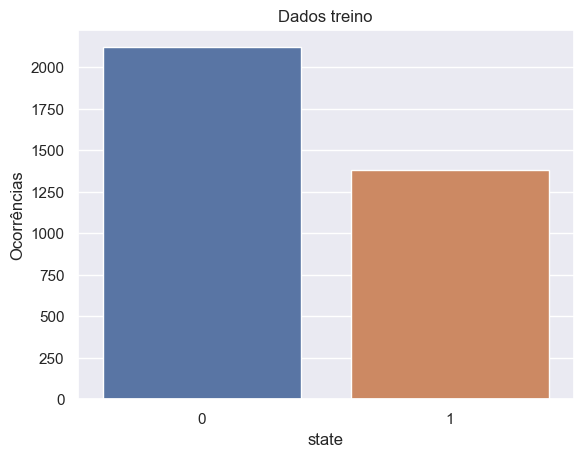

C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


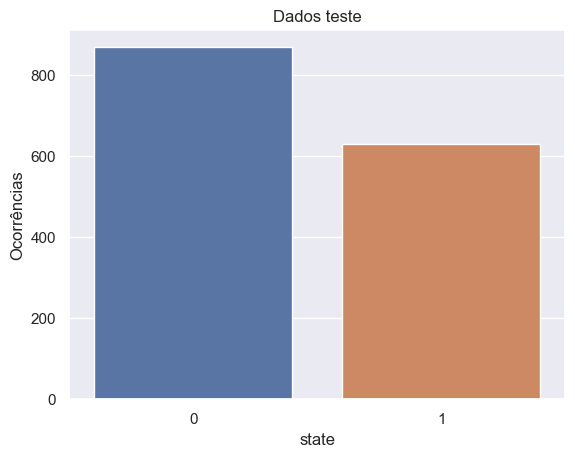

In [7]:
grafico_barras(y_train,'state','Dados treino','state','Ocorrências')
grafico_barras(y_test,'state','Dados teste','state','Ocorrências')

In [8]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from scikeras.wrappers import KerasClassifier

In [10]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.1


In [11]:
def build_model(activation='sigmoid', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(16, input_dim=4, activation=activation))
    model.add(Dense(12, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Output layer

    # Compile the model
    model.compile(
        loss='binary_crossentropy',
        optimizer=tf.optimizers.Adam(learning_rate),
        metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )
    return model

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled = pd.DataFrame(scaler_x.transform(X[X.columns]), columns = X.columns)

In [13]:
X.head()

,pledged,backers,usd pledged,usd_pledged_real
372978,125.0,2,125.0,125.0
372979,120.0,3,120.0,120.0
372980,0.0,0,0.0,0.0
372981,1502.0,12,1502.0,1502.0
372983,25.0,1,25.0,25.0


In [14]:
X_scaled.head()

,pledged,backers,usd pledged,usd_pledged_real
0,0.000040,0.000082,0.000040,0.000040
1,0.000038,0.000123,0.000038,0.000038
2,0.000000,0.000000,0.000000,0.000000
3,0.000480,0.000493,0.000480,0.000480
4,0.000008,0.000041,0.000008,0.000008


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=2022)

In [16]:
optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer = optimizer)

In [17]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 2021)

In [18]:
build_model = build_model()
model = KerasClassifier(model = build_model, batch_size = 40, validation_split = 0.2, epochs = 60)

In [19]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring = 'accuracy',refit = 'True', verbose = 1,error_score='raise',)
grid_search.fit(X_train,y_train)

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp1wha_u_c\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp1wha_u_c\assets


Fitting 5 folds for each of 3 candidates, totalling 15 fits


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpb1hhqfb4\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpb1hhqfb4\assets


Epoch 1/60
64/64 [==============================] - 2s 14ms/step - loss: 0.6750 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6804 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6793 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6810 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6809 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [=============================

64/64 [==============================] - 0s 4ms/step - loss: 0.3828 - accuracy: 0.8332 - precision: 0.8147 - recall: 0.7568 - val_loss: 0.4078 - val_accuracy: 0.8281 - val_precision: 0.7932 - val_recall: 0.7932
Epoch 38/60
64/64 [==============================] - 0s 5ms/step - loss: 0.3839 - accuracy: 0.8348 - precision: 0.8135 - recall: 0.7636 - val_loss: 0.4083 - val_accuracy: 0.8250 - val_precision: 0.7873 - val_recall: 0.7932
Epoch 39/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8305 - precision: 0.8087 - recall: 0.7568 - val_loss: 0.4048 - val_accuracy: 0.8281 - val_precision: 0.8047 - val_recall: 0.7744
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 0.8297 - precision: 0.8027 - recall: 0.7636 - val_loss: 0.4045 - val_accuracy: 0.8297 - val_precision: 0.8127 - val_recall: 0.7669
Epoch 41/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3883 - accuracy: 0.8270 - precision: 0.8056 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp_jen0hnv\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp_jen0hnv\assets


Epoch 1/60
64/64 [==============================] - 4s 29ms/step - loss: 0.6786 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6783 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 1s 11ms/step - loss: 0.6797 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6793 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 1s 11ms/step - loss: 0.6784 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6792 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 1s 11ms/step - loss: 0.6765 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6778 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==========================

64/64 [==============================] - 0s 4ms/step - loss: 0.4152 - accuracy: 0.8320 - precision: 0.8118 - recall: 0.7651 - val_loss: 0.4097 - val_accuracy: 0.8172 - val_precision: 0.8109 - val_recall: 0.7283
Epoch 38/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3867 - accuracy: 0.8313 - precision: 0.8114 - recall: 0.7632 - val_loss: 0.4417 - val_accuracy: 0.8234 - val_precision: 0.7621 - val_recall: 0.8340
Epoch 39/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3834 - accuracy: 0.8352 - precision: 0.8146 - recall: 0.7709 - val_loss: 0.4087 - val_accuracy: 0.8125 - val_precision: 0.7778 - val_recall: 0.7660
Epoch 40/60
64/64 [==============================] - 0s 5ms/step - loss: 0.3965 - accuracy: 0.8332 - precision: 0.8111 - recall: 0.7699 - val_loss: 0.4046 - val_accuracy: 0.8156 - val_precision: 0.7905 - val_recall: 0.7547
Epoch 41/60
64/64 [==============================] - 0s 5ms/step - loss: 0.3989 - accuracy: 0.8340 - precision: 0.8121 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpe_l8e5hn\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpe_l8e5hn\assets


Epoch 1/60
64/64 [==============================] - 2s 14ms/step - loss: 0.6761 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6798 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 5ms/step - loss: 0.6749 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6797 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6810 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6738 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6796 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [=============================

64/64 [==============================] - 0s 4ms/step - loss: 0.3934 - accuracy: 0.8363 - precision: 0.8164 - recall: 0.7648 - val_loss: 0.4240 - val_accuracy: 0.7953 - val_precision: 0.8072 - val_recall: 0.6716
Epoch 38/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3809 - accuracy: 0.8340 - precision: 0.8192 - recall: 0.7532 - val_loss: 0.4305 - val_accuracy: 0.7937 - val_precision: 0.8091 - val_recall: 0.6642
Epoch 39/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3786 - accuracy: 0.8371 - precision: 0.8181 - recall: 0.7648 - val_loss: 0.4113 - val_accuracy: 0.8125 - val_precision: 0.7846 - val_recall: 0.7612
Epoch 40/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3832 - accuracy: 0.8324 - precision: 0.8086 - recall: 0.7638 - val_loss: 0.4298 - val_accuracy: 0.7937 - val_precision: 0.8091 - val_recall: 0.6642
Epoch 41/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3821 - accuracy: 0.8363 - precision: 0.8144 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp2ie89u1k\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp2ie89u1k\assets


Epoch 1/60
64/64 [==============================] - 2s 10ms/step - loss: 0.6720 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6899 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6719 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6894 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6730 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6888 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6723 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6945 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [=============================

64/64 [==============================] - 0s 4ms/step - loss: 0.3887 - accuracy: 0.8305 - precision: 0.8042 - recall: 0.7549 - val_loss: 0.4222 - val_accuracy: 0.8125 - val_precision: 0.8189 - val_recall: 0.7376
Epoch 38/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3918 - accuracy: 0.8328 - precision: 0.8029 - recall: 0.7648 - val_loss: 0.4183 - val_accuracy: 0.8172 - val_precision: 0.7978 - val_recall: 0.7837
Epoch 39/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3903 - accuracy: 0.8344 - precision: 0.8050 - recall: 0.7668 - val_loss: 0.4745 - val_accuracy: 0.7750 - val_precision: 0.8165 - val_recall: 0.6312
Epoch 40/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3905 - accuracy: 0.8309 - precision: 0.8025 - recall: 0.7589 - val_loss: 0.4230 - val_accuracy: 0.8109 - val_precision: 0.8207 - val_recall: 0.7305
Epoch 41/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3852 - accuracy: 0.8309 - precision: 0.7994 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpnx8kglf1\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpnx8kglf1\assets


Epoch 1/60
64/64 [==============================] - 2s 11ms/step - loss: 0.6767 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6702 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6757 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6783 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 5ms/step - loss: 0.6756 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6712 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6692 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [=============================

64/64 [==============================] - 0s 4ms/step - loss: 0.3768 - accuracy: 0.8375 - precision: 0.8216 - recall: 0.7645 - val_loss: 0.4189 - val_accuracy: 0.8156 - val_precision: 0.7628 - val_recall: 0.7689
Epoch 38/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3820 - accuracy: 0.8371 - precision: 0.8155 - recall: 0.7722 - val_loss: 0.4157 - val_accuracy: 0.8172 - val_precision: 0.7702 - val_recall: 0.7610
Epoch 39/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3913 - accuracy: 0.8293 - precision: 0.8066 - recall: 0.7606 - val_loss: 0.4295 - val_accuracy: 0.8141 - val_precision: 0.7500 - val_recall: 0.7888
Epoch 40/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3766 - accuracy: 0.8348 - precision: 0.8118 - recall: 0.7703 - val_loss: 0.4234 - val_accuracy: 0.8078 - val_precision: 0.7909 - val_recall: 0.6932
Epoch 41/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3892 - accuracy: 0.8309 - precision: 0.8092 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpbbtej2gc\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpbbtej2gc\assets


Epoch 1/60
64/64 [==============================] - 2s 11ms/step - loss: 0.6752 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6788 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6769 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6787 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6742 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6791 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6745 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6785 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [=============================

64/64 [==============================] - 0s 4ms/step - loss: 0.4013 - accuracy: 0.8387 - precision: 0.8227 - recall: 0.7626 - val_loss: 0.4076 - val_accuracy: 0.8266 - val_precision: 0.8039 - val_recall: 0.7707
Epoch 38/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3863 - accuracy: 0.8328 - precision: 0.8106 - recall: 0.7617 - val_loss: 0.4097 - val_accuracy: 0.8234 - val_precision: 0.8201 - val_recall: 0.7368
Epoch 39/60
64/64 [==============================] - 0s 5ms/step - loss: 0.3827 - accuracy: 0.8344 - precision: 0.8166 - recall: 0.7578 - val_loss: 0.4086 - val_accuracy: 0.8266 - val_precision: 0.7881 - val_recall: 0.7970
Epoch 40/60
64/64 [==============================] - 0s 5ms/step - loss: 0.3848 - accuracy: 0.8383 - precision: 0.8152 - recall: 0.7724 - val_loss: 0.4048 - val_accuracy: 0.8281 - val_precision: 0.7932 - val_recall: 0.7932
Epoch 41/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3807 - accuracy: 0.8344 - precision: 0.8082 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpyc0sr4_n\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpyc0sr4_n\assets


Epoch 1/60
64/64 [==============================] - 2s 11ms/step - loss: 0.6768 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6823 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6772 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6782 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6766 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6784 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6787 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6785 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [=============================

64/64 [==============================] - 0s 4ms/step - loss: 0.3916 - accuracy: 0.8281 - precision: 0.8067 - recall: 0.7603 - val_loss: 0.4074 - val_accuracy: 0.8172 - val_precision: 0.8008 - val_recall: 0.7434
Epoch 38/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3984 - accuracy: 0.8285 - precision: 0.8082 - recall: 0.7593 - val_loss: 0.4067 - val_accuracy: 0.8172 - val_precision: 0.7984 - val_recall: 0.7472
Epoch 39/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3955 - accuracy: 0.8313 - precision: 0.8077 - recall: 0.7689 - val_loss: 0.4156 - val_accuracy: 0.8203 - val_precision: 0.7778 - val_recall: 0.7925
Epoch 40/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3830 - accuracy: 0.8324 - precision: 0.8046 - recall: 0.7776 - val_loss: 0.4065 - val_accuracy: 0.8188 - val_precision: 0.8066 - val_recall: 0.7396
Epoch 41/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3841 - accuracy: 0.8313 - precision: 0.8070 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp7pd4mucp\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp7pd4mucp\assets


Epoch 1/60
64/64 [==============================] - 2s 11ms/step - loss: 0.6788 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6855 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6742 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6841 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6757 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6796 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6740 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6795 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [=============================

64/64 [==============================] - 0s 4ms/step - loss: 0.3852 - accuracy: 0.8328 - precision: 0.8127 - recall: 0.7590 - val_loss: 0.4441 - val_accuracy: 0.7812 - val_precision: 0.8077 - val_recall: 0.6269
Epoch 38/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3891 - accuracy: 0.8281 - precision: 0.8065 - recall: 0.7532 - val_loss: 0.4472 - val_accuracy: 0.8281 - val_precision: 0.7705 - val_recall: 0.8396
Epoch 39/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3868 - accuracy: 0.8348 - precision: 0.8189 - recall: 0.7561 - val_loss: 0.4305 - val_accuracy: 0.8234 - val_precision: 0.7739 - val_recall: 0.8172
Epoch 40/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3802 - accuracy: 0.8391 - precision: 0.8158 - recall: 0.7745 - val_loss: 0.4362 - val_accuracy: 0.7906 - val_precision: 0.8131 - val_recall: 0.6493
Epoch 41/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3797 - accuracy: 0.8355 - precision: 0.8173 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpbi_ni65o\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpbi_ni65o\assets


Epoch 1/60
64/64 [==============================] - 2s 11ms/step - loss: 0.6732 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6953 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6741 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6874 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6906 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6711 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6982 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [=============================

64/64 [==============================] - 0s 4ms/step - loss: 0.3993 - accuracy: 0.8305 - precision: 0.8055 - recall: 0.7530 - val_loss: 0.4326 - val_accuracy: 0.7953 - val_precision: 0.8159 - val_recall: 0.6915
Epoch 38/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3904 - accuracy: 0.8305 - precision: 0.8068 - recall: 0.7510 - val_loss: 0.4422 - val_accuracy: 0.7891 - val_precision: 0.8155 - val_recall: 0.6738
Epoch 39/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3894 - accuracy: 0.8293 - precision: 0.7998 - recall: 0.7579 - val_loss: 0.4552 - val_accuracy: 0.7781 - val_precision: 0.8097 - val_recall: 0.6489
Epoch 40/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3965 - accuracy: 0.8273 - precision: 0.8019 - recall: 0.7480 - val_loss: 0.4178 - val_accuracy: 0.8141 - val_precision: 0.8099 - val_recall: 0.7553
Epoch 41/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3888 - accuracy: 0.8379 - precision: 0.8068 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpt43_b4mx\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpt43_b4mx\assets


Epoch 1/60
64/64 [==============================] - 2s 10ms/step - loss: 0.6786 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6738 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6767 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6705 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6761 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6730 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6749 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6723 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [=============================

64/64 [==============================] - 0s 4ms/step - loss: 0.3898 - accuracy: 0.8340 - precision: 0.8199 - recall: 0.7558 - val_loss: 0.4335 - val_accuracy: 0.8141 - val_precision: 0.7519 - val_recall: 0.7849
Epoch 38/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3856 - accuracy: 0.8324 - precision: 0.8139 - recall: 0.7597 - val_loss: 0.4173 - val_accuracy: 0.8203 - val_precision: 0.7957 - val_recall: 0.7291
Epoch 39/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3787 - accuracy: 0.8379 - precision: 0.8231 - recall: 0.7635 - val_loss: 0.4161 - val_accuracy: 0.8203 - val_precision: 0.7810 - val_recall: 0.7530
Epoch 40/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3866 - accuracy: 0.8336 - precision: 0.8184 - recall: 0.7568 - val_loss: 0.4183 - val_accuracy: 0.8156 - val_precision: 0.7628 - val_recall: 0.7689
Epoch 41/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3800 - accuracy: 0.8344 - precision: 0.8155 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpvqi8gfky\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpvqi8gfky\assets


Epoch 1/60
64/64 [==============================] - 2s 10ms/step - loss: 0.6743 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6803 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6742 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6862 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6753 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6786 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6814 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [=============================

64/64 [==============================] - 0s 4ms/step - loss: 0.3987 - accuracy: 0.8305 - precision: 0.8043 - recall: 0.7636 - val_loss: 0.4290 - val_accuracy: 0.8188 - val_precision: 0.7641 - val_recall: 0.8158
Epoch 38/60
64/64 [==============================] - 0s 4ms/step - loss: 0.4010 - accuracy: 0.8277 - precision: 0.8067 - recall: 0.7510 - val_loss: 0.4256 - val_accuracy: 0.8031 - val_precision: 0.8182 - val_recall: 0.6767
Epoch 39/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3921 - accuracy: 0.8324 - precision: 0.8117 - recall: 0.7588 - val_loss: 0.4338 - val_accuracy: 0.8000 - val_precision: 0.8165 - val_recall: 0.6692
Epoch 40/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3856 - accuracy: 0.8379 - precision: 0.8150 - recall: 0.7714 - val_loss: 0.4157 - val_accuracy: 0.8141 - val_precision: 0.8182 - val_recall: 0.7105
Epoch 41/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3849 - accuracy: 0.8324 - precision: 0.8072 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpa6_gnkvh\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpa6_gnkvh\assets


Epoch 1/60
64/64 [==============================] - 2s 11ms/step - loss: 0.6791 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6792 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6782 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6781 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6765 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6800 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6782 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [=============================

64/64 [==============================] - 0s 4ms/step - loss: 0.3841 - accuracy: 0.8305 - precision: 0.8085 - recall: 0.7651 - val_loss: 0.4071 - val_accuracy: 0.8156 - val_precision: 0.7882 - val_recall: 0.7585
Epoch 38/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3871 - accuracy: 0.8336 - precision: 0.8113 - recall: 0.7709 - val_loss: 0.4135 - val_accuracy: 0.8188 - val_precision: 0.7790 - val_recall: 0.7849
Epoch 39/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3949 - accuracy: 0.8277 - precision: 0.8004 - recall: 0.7689 - val_loss: 0.4443 - val_accuracy: 0.8234 - val_precision: 0.7603 - val_recall: 0.8377
Epoch 40/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3847 - accuracy: 0.8320 - precision: 0.8056 - recall: 0.7747 - val_loss: 0.4371 - val_accuracy: 0.8000 - val_precision: 0.8128 - val_recall: 0.6717
Epoch 41/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3795 - accuracy: 0.8332 - precision: 0.8068 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpu9ksxa7l\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpu9ksxa7l\assets


Epoch 1/60
64/64 [==============================] - 2s 12ms/step - loss: 0.6760 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6819 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6745 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6804 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6798 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6742 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6807 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [=============================

64/64 [==============================] - 1s 8ms/step - loss: 0.3883 - accuracy: 0.8348 - precision: 0.8217 - recall: 0.7522 - val_loss: 0.4310 - val_accuracy: 0.7953 - val_precision: 0.8157 - val_recall: 0.6604
Epoch 38/60
64/64 [==============================] - 1s 9ms/step - loss: 0.3791 - accuracy: 0.8371 - precision: 0.8221 - recall: 0.7590 - val_loss: 0.4126 - val_accuracy: 0.8125 - val_precision: 0.7846 - val_recall: 0.7612
Epoch 39/60
64/64 [==============================] - 1s 12ms/step - loss: 0.3864 - accuracy: 0.8324 - precision: 0.8049 - recall: 0.7697 - val_loss: 0.4164 - val_accuracy: 0.8094 - val_precision: 0.8147 - val_recall: 0.7052
Epoch 40/60
64/64 [==============================] - 0s 7ms/step - loss: 0.3847 - accuracy: 0.8336 - precision: 0.8164 - recall: 0.7561 - val_loss: 0.4285 - val_accuracy: 0.7953 - val_precision: 0.8100 - val_recall: 0.6679
Epoch 41/60
64/64 [==============================] - 1s 10ms/step - loss: 0.3834 - accuracy: 0.8309 - precision: 0.8047

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpw38_h2r4\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpw38_h2r4\assets


Epoch 1/60
64/64 [==============================] - 4s 32ms/step - loss: 0.6711 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6880 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 1s 11ms/step - loss: 0.6736 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6948 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 1s 10ms/step - loss: 0.6726 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6873 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 5ms/step - loss: 0.6705 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.7055 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [===========================

64/64 [==============================] - 0s 4ms/step - loss: 0.3893 - accuracy: 0.8320 - precision: 0.8038 - recall: 0.7609 - val_loss: 0.4167 - val_accuracy: 0.8203 - val_precision: 0.8036 - val_recall: 0.7837
Epoch 38/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3950 - accuracy: 0.8293 - precision: 0.7961 - recall: 0.7638 - val_loss: 0.4173 - val_accuracy: 0.8172 - val_precision: 0.7915 - val_recall: 0.7943
Epoch 39/60
64/64 [==============================] - 0s 4ms/step - loss: 0.4011 - accuracy: 0.8340 - precision: 0.8035 - recall: 0.7678 - val_loss: 0.4171 - val_accuracy: 0.8188 - val_precision: 0.7923 - val_recall: 0.7979
Epoch 40/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3867 - accuracy: 0.8328 - precision: 0.8010 - recall: 0.7678 - val_loss: 0.4238 - val_accuracy: 0.8094 - val_precision: 0.8200 - val_recall: 0.7270
Epoch 41/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3823 - accuracy: 0.8340 - precision: 0.8041 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmph7c5hmw5\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmph7c5hmw5\assets


Epoch 1/60
64/64 [==============================] - 2s 11ms/step - loss: 0.6779 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6698 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6754 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6715 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6754 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6694 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 4ms/step - loss: 0.6758 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6704 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [=============================

64/64 [==============================] - 0s 4ms/step - loss: 0.3825 - accuracy: 0.8324 - precision: 0.8185 - recall: 0.7529 - val_loss: 0.4203 - val_accuracy: 0.8109 - val_precision: 0.7902 - val_recall: 0.7052
Epoch 38/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3787 - accuracy: 0.8348 - precision: 0.8163 - recall: 0.7635 - val_loss: 0.4211 - val_accuracy: 0.8141 - val_precision: 0.7920 - val_recall: 0.7131
Epoch 39/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3819 - accuracy: 0.8301 - precision: 0.8076 - recall: 0.7616 - val_loss: 0.4263 - val_accuracy: 0.8078 - val_precision: 0.7991 - val_recall: 0.6813
Epoch 40/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3851 - accuracy: 0.8336 - precision: 0.8170 - recall: 0.7587 - val_loss: 0.4418 - val_accuracy: 0.8094 - val_precision: 0.7329 - val_recall: 0.8088
Epoch 41/60
64/64 [==============================] - 0s 4ms/step - loss: 0.3797 - accuracy: 0.8328 - precision: 0.8089 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp9o1fc6nb\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp9o1fc6nb\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp9l28u76m\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp9l28u76m\assets


Epoch 1/60
80/80 [==============================] - 2s 9ms/step - loss: 0.6767 - accuracy: 0.5978 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6802 - val_accuracy: 0.5838 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
80/80 [==============================] - 0s 4ms/step - loss: 0.6749 - accuracy: 0.5978 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6788 - val_accuracy: 0.5838 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
80/80 [==============================] - 0s 4ms/step - loss: 0.6745 - accuracy: 0.5978 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6788 - val_accuracy: 0.5838 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
80/80 [==============================] - 0s 4ms/step - loss: 0.6738 - accuracy: 0.5978 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6777 - val_accuracy: 0.5838 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
80/80 [==============================

80/80 [==============================] - 0s 4ms/step - loss: 0.3784 - accuracy: 0.8353 - precision: 0.8069 - recall: 0.7762 - val_loss: 0.4124 - val_accuracy: 0.8163 - val_precision: 0.8079 - val_recall: 0.7327
Epoch 38/60
80/80 [==============================] - 0s 4ms/step - loss: 0.3814 - accuracy: 0.8384 - precision: 0.8100 - recall: 0.7817 - val_loss: 0.4103 - val_accuracy: 0.8200 - val_precision: 0.7708 - val_recall: 0.8078
Epoch 39/60
80/80 [==============================] - 0s 4ms/step - loss: 0.3868 - accuracy: 0.8372 - precision: 0.8006 - recall: 0.7925 - val_loss: 0.4466 - val_accuracy: 0.7912 - val_precision: 0.8074 - val_recall: 0.6547
Epoch 40/60
80/80 [==============================] - 0s 4ms/step - loss: 0.3780 - accuracy: 0.8353 - precision: 0.8035 - recall: 0.7817 - val_loss: 0.4010 - val_accuracy: 0.8188 - val_precision: 0.7866 - val_recall: 0.7748
Epoch 41/60
80/80 [==============================] - 0s 4ms/step - loss: 0.3740 - accuracy: 0.8388 - precision: 0.8072 -

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             error_score='raise',
             estimator=KerasClassifier(batch_size=40, epochs=60, model=<keras.engine.sequential.Sequential object at 0x000001DE6249A310>, validation_split=0.2),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             refit='True', scoring='accuracy', verbose=1)

In [20]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

Best: 0.836500 using {'optimizer': 'RMSprop'}


In [21]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [22]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" %(mean, stdev,param))

0.833250 (0.008426) with {'optimizer': 'SGD'}
0.836500 (0.004430) with {'optimizer': 'RMSprop'}
0.836000 (0.004430) with {'optimizer': 'Adagrad'}


In [23]:
best_mlp_model = grid_search.best_estimator_

In [24]:
best_mlp_model.fit(X_train, y_train, epochs =100, validation_data = (X_test, y_test), verbose =1)

Epoch 1/100
100/100 [==============================] - 1s 9ms/step - loss: 0.3744 - accuracy: 0.8315 - precision: 0.7843 - recall: 0.8056 - val_loss: 0.3782 - val_accuracy: 0.8360 - val_precision: 0.7963 - val_recall: 0.7801
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3728 - accuracy: 0.8363 - precision: 0.7901 - recall: 0.8111 - val_loss: 0.4386 - val_accuracy: 0.8290 - val_precision: 0.7236 - val_recall: 0.9105
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3733 - accuracy: 0.8370 - precision: 0.7861 - recall: 0.8210 - val_loss: 0.4039 - val_accuracy: 0.8290 - val_precision: 0.7391 - val_recall: 0.8696
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3663 - accuracy: 0.8363 - precision: 0.7840 - recall: 0.8222 - val_loss: 0.3728 - val_accuracy: 0.8330 - val_precision: 0.7828 - val_recall: 0.7928
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3822 - accuracy: 0.8320

100/100 [==============================] - 0s 4ms/step - loss: 0.3661 - accuracy: 0.8388 - precision: 0.7794 - recall: 0.8395 - val_loss: 0.3796 - val_accuracy: 0.8270 - val_precision: 0.7339 - val_recall: 0.8747
Epoch 38/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3704 - accuracy: 0.8375 - precision: 0.7737 - recall: 0.8463 - val_loss: 0.3608 - val_accuracy: 0.8360 - val_precision: 0.7696 - val_recall: 0.8286
Epoch 39/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3585 - accuracy: 0.8380 - precision: 0.7733 - recall: 0.8488 - val_loss: 0.3663 - val_accuracy: 0.8360 - val_precision: 0.7696 - val_recall: 0.8286
Epoch 40/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3647 - accuracy: 0.8410 - precision: 0.7780 - recall: 0.8500 - val_loss: 0.3612 - val_accuracy: 0.8270 - val_precision: 0.7500 - val_recall: 0.8363
Epoch 41/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3597 - accuracy: 0.8393 - preci

100/100 [==============================] - 0s 4ms/step - loss: 0.3614 - accuracy: 0.8407 - precision: 0.7744 - recall: 0.8562 - val_loss: 0.3591 - val_accuracy: 0.8300 - val_precision: 0.7517 - val_recall: 0.8440
Epoch 74/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3572 - accuracy: 0.8382 - precision: 0.7701 - recall: 0.8562 - val_loss: 0.3682 - val_accuracy: 0.8350 - val_precision: 0.7703 - val_recall: 0.8235
Epoch 75/100
100/100 [==============================] - 0s 5ms/step - loss: 0.3614 - accuracy: 0.8367 - precision: 0.7715 - recall: 0.8481 - val_loss: 0.3626 - val_accuracy: 0.8300 - val_precision: 0.7429 - val_recall: 0.8645
Epoch 76/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3606 - accuracy: 0.8403 - precision: 0.7673 - recall: 0.8691 - val_loss: 0.3571 - val_accuracy: 0.8310 - val_precision: 0.7593 - val_recall: 0.8312
Epoch 77/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3600 - accuracy: 0.8397 - preci

KerasClassifier(
	model=<keras.engine.sequential.Sequential object at 0x000001DE70E5FFD0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=40
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=60
	class_weight=None
)

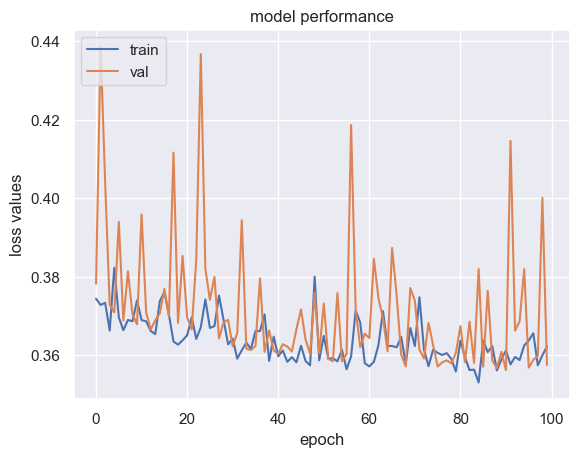

In [25]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

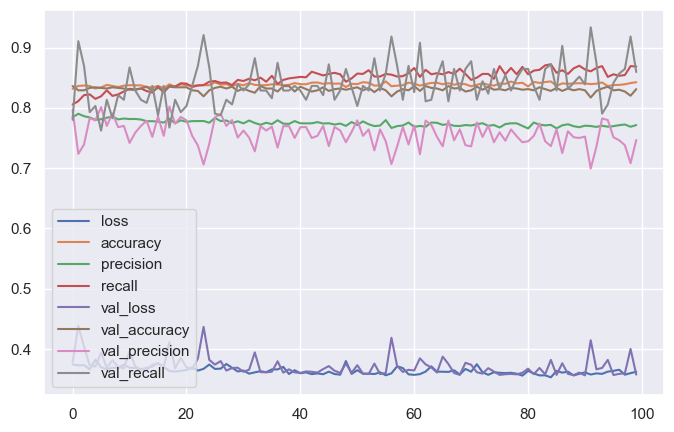

In [26]:
pd.DataFrame(best_mlp_model.history_).plot(figsize=(8,5))
plt.show()

In [27]:
prediction = best_mlp_model.predict(X_test)

25/25 [==============================] - 0s 2ms/step


In [28]:
from sklearn import metrics

In [29]:
accuracy = metrics.accuracy_score(y_test, prediction)
precision = metrics.precision_score(y_test, prediction)
recall = metrics.recall_score(y_test, prediction)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)

Accuracy:  0.831
Precision:  0.7466666666666667
Recall:  0.8593350383631714


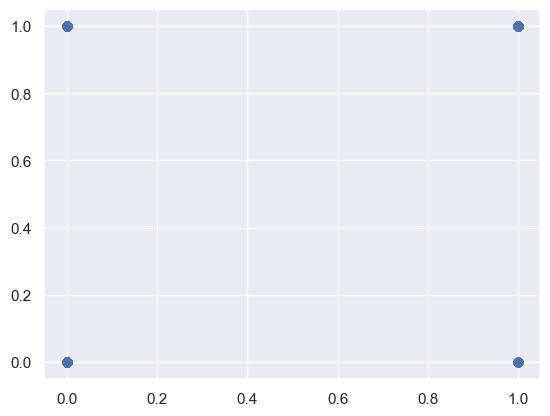

In [30]:
plt.scatter(y_test,prediction)

In [31]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test[:limit],color='green',label='Actual')
    plt.plot(prediction[:limit],color='red',label='Predicted')
    plt.grid(alpha=0.3)
    
    plt.title('Real x Predicted')
    plt.legend()
    plt.show()

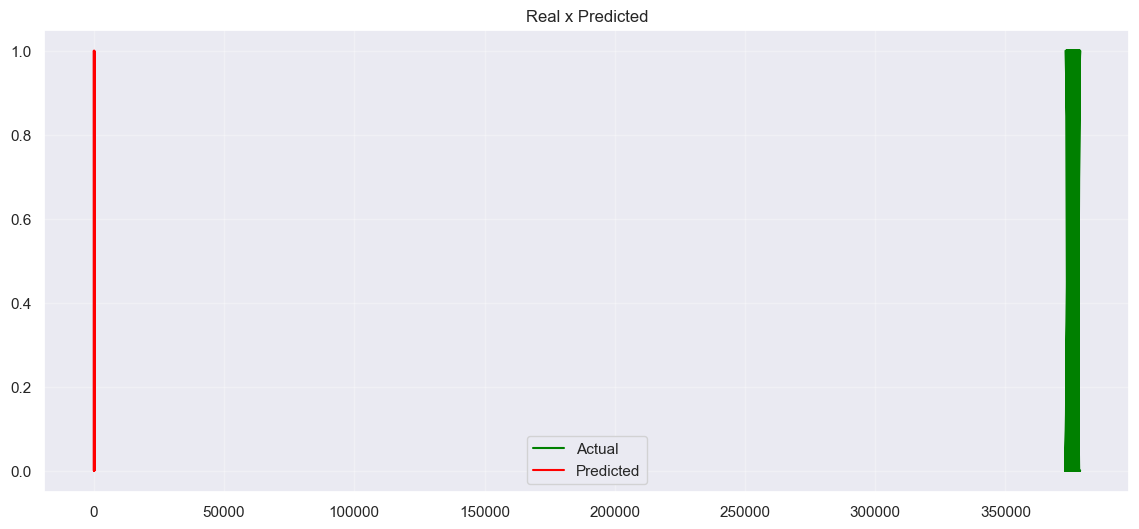

In [32]:
real_predicted_viz(200)

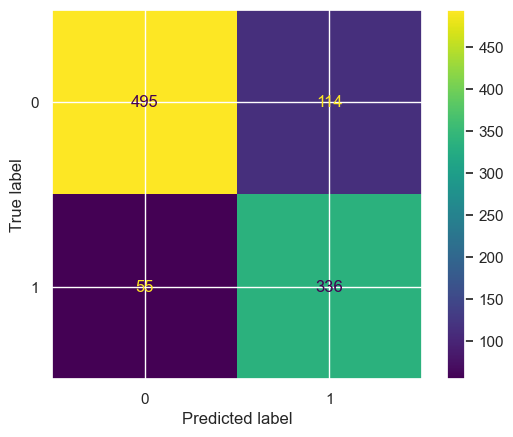

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,prediction)

plt.show()

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       609
           1       0.75      0.86      0.80       391

    accuracy                           0.83      1000
   macro avg       0.82      0.84      0.83      1000
weighted avg       0.84      0.83      0.83      1000

